<a href="https://colab.research.google.com/github/Darshan0805/AI-in-Cyber-Security/blob/main/Phising_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('Phishing_Legitimate_full.csv')
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [ ]:
df.shape

(10000, 50)

In [ ]:
df.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [ ]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.750000,5000.500000,7500.250000,10000.0
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0


In [ ]:
class_counts = df['CLASS_LABEL'].value_counts()
print(class_counts)

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


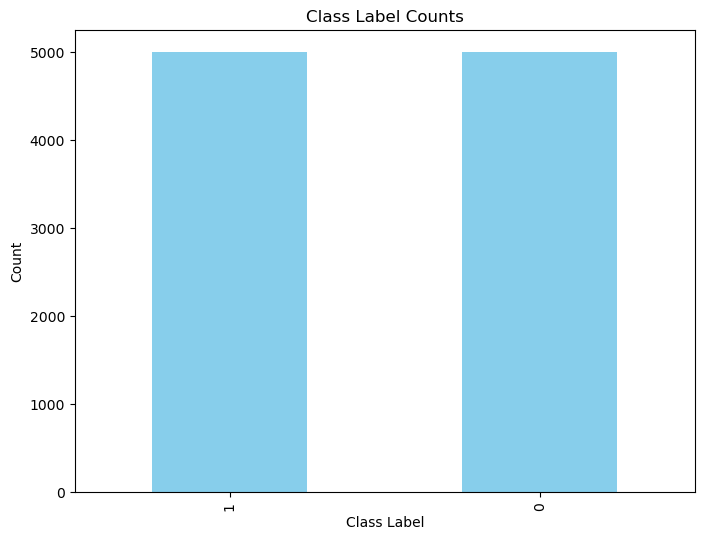

In [ ]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Label Counts')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.show()

In [ ]:
correlations = []
for feature in df.columns[:-1]:
    correlation = df['CLASS_LABEL'].corr(df[feature])
    correlations.append((feature, correlation))


correlations.sort(key=lambda x: abs(x[1]), reverse=True)


for feature, correlation in correlations:
    print(f"Correlation between {feature} and CLASS_LABEL: {correlation:.2f}")

Correlation between id and CLASS_LABEL: -0.87
Correlation between HttpsInHostname and CLASS_LABEL: nan
Correlation between PctExtNullSelfRedirectHyperlinksRT and CLASS_LABEL: -0.54
Correlation between FrequentDomainNameMismatch and CLASS_LABEL: 0.46
Correlation between NumDash and CLASS_LABEL: -0.37
Correlation between SubmitInfoToEmail and CLASS_LABEL: -0.36
Correlation between PctNullSelfRedirectHyperlinks and CLASS_LABEL: 0.34
Correlation between InsecureForms and CLASS_LABEL: 0.32
Correlation between NumDots and CLASS_LABEL: 0.29
Correlation between PctExtHyperlinks and CLASS_LABEL: 0.26
Correlation between NumSensitiveWords and CLASS_LABEL: 0.26
Correlation between IframeOrFrame and CLASS_LABEL: -0.24
Correlation between PathLevel and CLASS_LABEL: 0.23
Correlation between AbnormalExtFormActionR and CLASS_LABEL: 0.19
Correlation between UrlLengthRT and CLASS_LABEL: 0.17
Correlation between HostnameLength and CLASS_LABEL: 0.17
Correlation between NumDashInHostname and CLASS_LABEL: 0

c:\Users\saida\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\saida\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


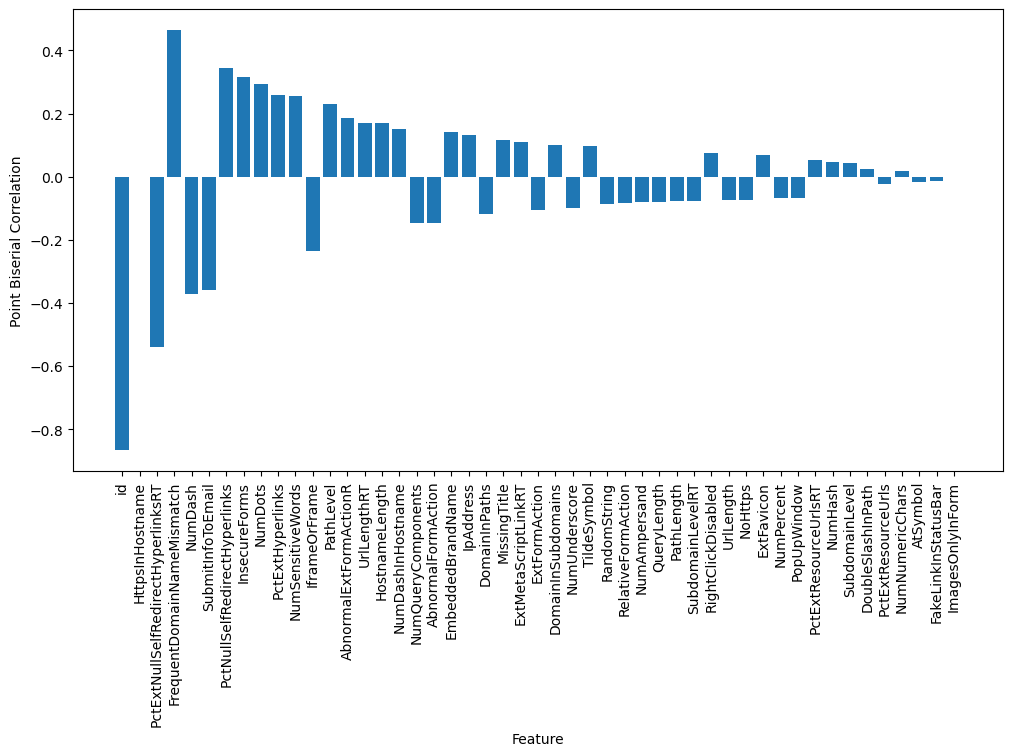

In [ ]:
feature_names, feature_correlations = zip(*correlations)
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_correlations)
plt.xlabel('Feature')
plt.ylabel('Point Biserial Correlation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
X = df.drop(columns=['CLASS_LABEL', 'id'])
y = df['CLASS_LABEL']


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential()

# Add input layer
model.add(keras.layers.Input(shape=(X_train.shape[1],)))

# Add hidden layers
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))

# Add output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


250/250 [==============================] - 3s 5ms/step - loss: 0.2496 - accuracy: 0.9106 - val_loss: 0.1518 - val_accuracy: 0.9455
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1234 - accuracy: 0.9535 - val_loss: 0.1304 - val_accuracy: 0.9500
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.1017 - accuracy: 0.9628 - val_loss: 0.1140 - val_accuracy: 0.9530
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0870 - accuracy: 0.9680 - val_loss: 0.1047 - val_accuracy: 0.9600
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0757 - accuracy: 0.9716 - val_loss: 0.0987 - val_accuracy: 0.9610
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0642 - accuracy: 0.9761 - val_loss: 0.0941 - val_accuracy: 0.9625
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0570 - accuracy: 0.9799 - val_loss: 0.0888 - val_accuracy: 0.9675
Epoc

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0817 - val_accuracy: 0.9700
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0360 - accuracy: 0.9884 - val_loss: 0.0928 - val_accuracy: 0.9680
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9887 - val_loss: 0.0914 - val_accuracy: 0.9700
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0785 - val_accuracy: 0.9735
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.0853 - val_accuracy: 0.9765
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0242 - accuracy: 0.9914 - val_loss: 0.0923 - val_accuracy: 0.9730
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0817 - val_accuracy: 0.9745
Epoch 

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

63/63 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9745
Test Accuracy: 97.45%


In [ ]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
class_report = classification_report(y_test, y_pred, target_names=['Non-Phishing', 'Phishing'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

Non-Phishing       0.56      1.00      0.72       988
    Phishing       1.00      0.25      0.40      1012

    accuracy                           0.62      2000
   macro avg       0.78      0.62      0.56      2000
weighted avg       0.78      0.62      0.56      2000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



<Axes: >

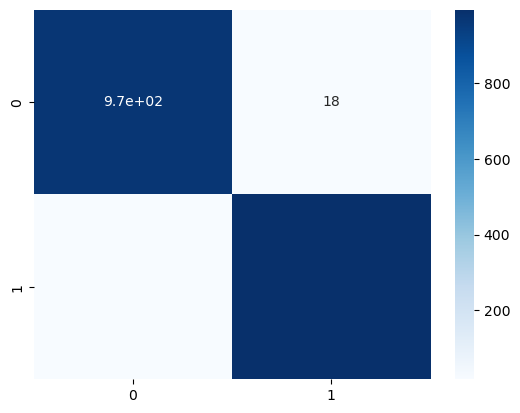

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model training
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')